In [59]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [60]:
# Set seed for reproducibility
np.random.seed(42)

In [61]:
# 1. Load and Preprocess the Wine Dataset
# Fetch Wine dataset (ID = 186)
wine = fetch_ucirepo(id=186)

# Extract features and target
X = wine.data.features  # Pandas DataFrame
y = wine.data.targets  # Pandas DataFrame

In [62]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [63]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


In [64]:
# Combine into a single DataFrame
df = pd.concat([X, y], axis=1)

In [ ]:
# # Filter for red wine only (based on metadata, red wine is first 1599 rows)
# df_red = df.iloc[:1599]  # Red wine has 1599 samples

In [82]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [85]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
# Binarize the target for classification
# Quality >= 6 is "good" (1), < 6 is "bad" (0)
df['quality_binary'] = (df['quality'] >= 6).astype(int)
print("\nBinary Target Distribution:")
print(df['quality_binary'].value_counts())


Binary Target Distribution:
quality_binary
1    4113
0    2384
Name: count, dtype: int64


In [ ]:
#Separate features and target
X = df.drop(['quality', 'quality_binary'], axis=1)  # Features
y = df['quality_binary']  # Binary target

In [88]:
#Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
#Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=1000 ,random_state=42)
# clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=1000, random_state=42)

In [116]:
#Prediction
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'\nTest Accuracy: {accuracy:.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Bad', 'Good']))


Test Accuracy: 0.7085

Classification Report:
              precision    recall  f1-score   support

         Bad       0.59      0.51      0.55       451
        Good       0.76      0.82      0.79       849

    accuracy                           0.71      1300
   macro avg       0.68      0.66      0.67      1300
weighted avg       0.70      0.71      0.70      1300



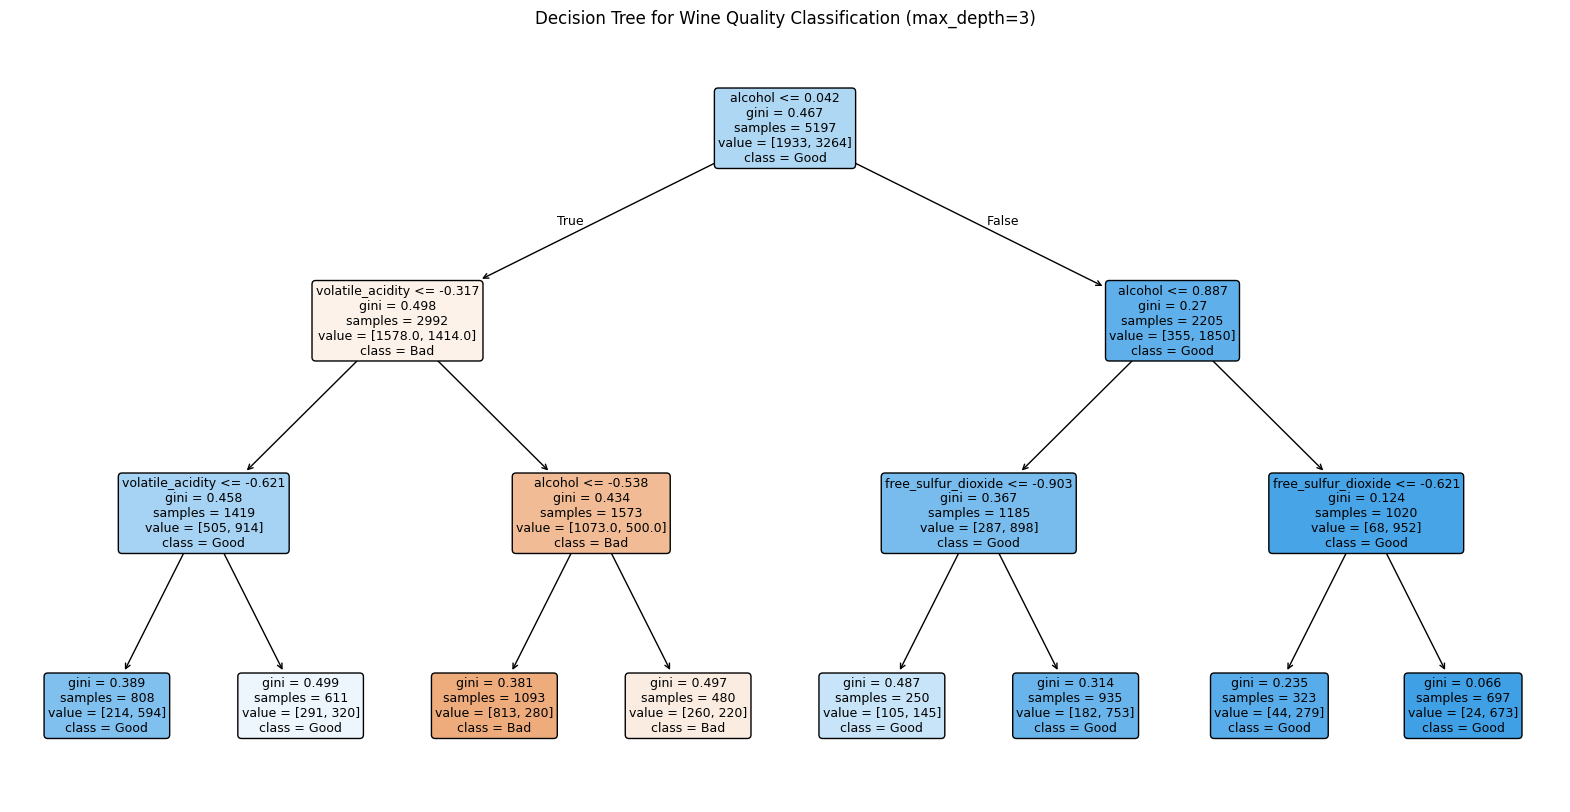

In [117]:
#Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['Bad', 'Good'],
    filled=True,
    rounded=True,
)
plt.title("Decision Tree for Wine Quality Classification (max_depth=3)")
plt.show()

In [118]:
#Feature importance
feature_importance = pd.DataFrame(
    {'Feature': X.columns, 'Importance': clf.feature_importances_}
)
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))


Feature Importance:
                 Feature  Importance
10               alcohol    0.651989
1       volatile_acidity    0.308090
5    free_sulfur_dioxide    0.039920
2            citric_acid    0.000000
0          fixed_acidity    0.000000
4              chlorides    0.000000
3         residual_sugar    0.000000
6   total_sulfur_dioxide    0.000000
7                density    0.000000
8                     pH    0.000000
9              sulphates    0.000000
